##Download Dataset

In [ ]:
!wget https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv

--2023-11-27 10:56:27--  https://raw.githubusercontent.com/GrmRy/Skripsi/main/Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17767 (17K) [text/plain]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>]  17.35K  --.-KB/s    in 0s      

2023-11-27 10:56:27 (82.1 MB/s) - ‘Dataset.csv’ saved [17767/17767]



## Import Libraries

In [ ]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Lambda, Reshape, RNN, LSTMCell,Dropout

import warnings
warnings.filterwarnings('ignore')

## Data Processing

In [ ]:
df=pd.read_csv("Dataset.csv",parse_dates=["Tanggal"],index_col=[0])
df.head(10)

,Inflow (m/s),Outflow(m/s),Curah Hujan (mm)
Tanggal,,,
2021-01-01,106.15,0.00,1.6
2021-01-02,104.53,0.00,3.5
2021-01-03,29.17,0.00,0.0
2021-01-04,44.03,0.00,2.3
2021-01-05,48.07,4.32,8.0
2021-01-06,71.51,0.00,8888.0
2021-01-07,64.15,6.53,0.0
2021-01-08,67.52,8.92,1.0
2021-01-09,28.10,0.00,43.5


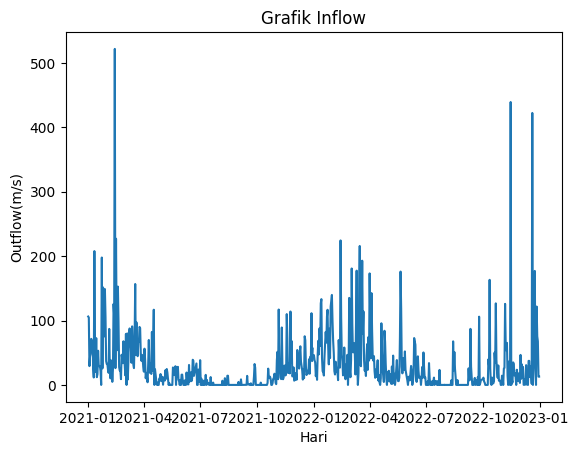

In [ ]:
plt.plot(df["Inflow (m/s)"])
plt.xlabel("Hari")
plt.ylabel("Outflow(m/s)")
plt.title("Grafik Inflow")
plt.show()

In [ ]:
df=df.drop(["Outflow(m/s)","Curah Hujan (mm)"],axis=1)

In [ ]:
df.head()

,Inflow (m/s)
Tanggal,
2021-01-01,106.15
2021-01-02,104.53
2021-01-03,29.17
2021-01-04,44.03
2021-01-05,48.07


In [ ]:
df.isnull().sum()

Inflow (m/s)    2
dtype: int64

In [ ]:
df.interpolate(method='linear',inplace=True)

In [ ]:
df.head(10)

,Inflow (m/s)
Tanggal,
2021-01-01,106.15
2021-01-02,104.53
2021-01-03,29.17
2021-01-04,44.03
2021-01-05,48.07
2021-01-06,71.51
2021-01-07,64.15
2021-01-08,67.52
2021-01-09,28.10


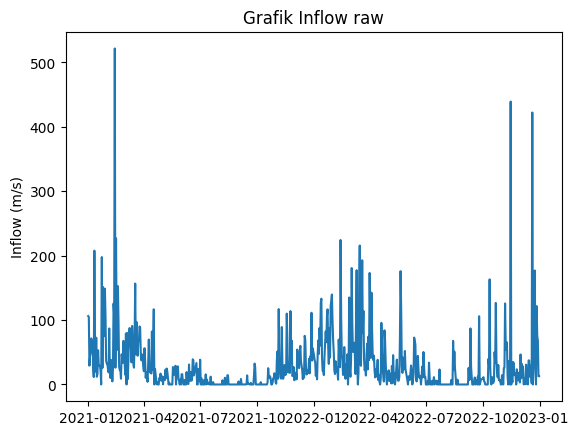

In [ ]:
plt.plot(df["Inflow (m/s)"])
plt.ylabel("Inflow (m/s)")
plt.title("Grafik Inflow raw")
plt.show()

In [ ]:
df.loc[df['Inflow (m/s)'] > 200, 'Inflow (m/s)'] = np.nan
df['Inflow (m/s)'].fillna(200,inplace=True)

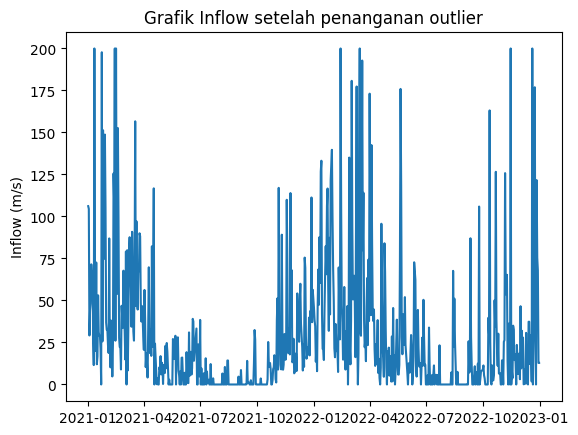

In [ ]:
plt.plot(df["Inflow (m/s)"])
plt.ylabel("Inflow (m/s)")
plt.title("Grafik Inflow setelah penanganan outlier")
plt.show()

In [ ]:
n = len(df)


train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

train_df.shape, test_df.shape

((584, 1), (146, 1))

In [ ]:
print(train_df)

            Inflow (m/s)
Tanggal                 
2021-01-01        106.15
2021-01-02        104.53
2021-01-03         29.17
2021-01-04         44.03
2021-01-05         48.07
...                  ...
2022-08-03          0.00
2022-08-04          0.00
2022-08-05          0.00
2022-08-06          0.00
2022-08-07          0.00

[584 rows x 1 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))


train_df = scaler.fit_transform(train_df)
#val_df[val_df.columns] = scaler.transform(val_df[val_df.columns])
test_df = scaler.fit_transform(test_df)

In [ ]:
print(train_df)

[[5.3075e-01]
 [5.2265e-01]
 [1.4585e-01]
 [2.2015e-01]
 [2.4035e-01]
 [3.5755e-01]
 [3.2075e-01]
 [3.3760e-01]
 [1.4050e-01]
 [5.7700e-02]
 [1.0000e+00]
 [3.1475e-01]
 [1.0015e-01]
 [3.6305e-01]
 [6.0150e-02]
 [8.3700e-02]
 [2.6525e-01]
 [1.5570e-01]
 [1.4410e-01]
 [1.4470e-01]
 [1.0575e-01]
 [0.0000e+00]
 [9.8875e-01]
 [1.2820e-01]
 [7.5665e-01]
 [3.7305e-01]
 [4.8815e-01]
 [7.4375e-01]
 [5.2660e-01]
 [1.8475e-01]
 [1.6235e-01]
 [1.6300e-01]
 [1.1680e-01]
 [9.3700e-02]
 [4.3470e-01]
 [1.1480e-01]
 [5.0900e-02]
 [1.9020e-01]
 [1.4320e-01]
 [2.3900e-02]
 [1.1975e-01]
 [6.2805e-01]
 [5.3845e-01]
 [1.0000e+00]
 [1.3030e-01]
 [1.0000e+00]
 [4.2880e-01]
 [2.6985e-01]
 [7.6305e-01]
 [4.9640e-01]
 [1.3870e-01]
 [1.1125e-01]
 [1.1145e-01]
 [4.4700e-02]
 [2.3425e-01]
 [2.0000e-01]
 [1.6875e-01]
 [3.3870e-01]
 [2.0095e-01]
 [1.5835e-01]
 [7.4100e-02]
 [3.9580e-01]
 [0.0000e+00]
 [3.9955e-01]
 [4.1700e-02]
 [1.8695e-01]
 [4.0155e-01]
 [4.3830e-01]
 [3.4375e-01]
 [2.8510e-01]
 [1.7190e-01]
 [4.54

In [ ]:
def createDataset(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
n_past=20
trainX,trainY=createDataset(train_df,n_past)

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (564, 20, 1)
trainY Shape--  (564,)


##Train Model

In [ ]:
model = Sequential()
model.add(LSTM(128,activation='relu',return_sequences=True,input_shape=(trainX.shape[1],trainX.shape[2] )))
model.add(Dropout(0.2))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 20, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 20, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 128417 (501.63 KB)
Trainable params: 12841

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=["mse"])
history=model.fit(trainX, trainY, epochs = 400, batch_size = 32, validation_split=0.1, verbose=1)
print("Hasil Training Model Inflow")

Epoch 1/400
16/16 [==============================] - 11s 170ms/step - loss: 0.0464 - mse: 0.0464 - val_loss: 0.0160 - val_mse: 0.0160
Epoch 2/400
16/16 [==============================] - 2s 106ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 3/400
16/16 [==============================] - 2s 138ms/step - loss: 0.0318 - mse: 0.0318 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 4/400
16/16 [==============================] - 3s 175ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0068 - val_mse: 0.0068
Epoch 5/400
16/16 [==============================] - 1s 69ms/step - loss: 0.0300 - mse: 0.0300 - val_loss: 0.0085 - val_mse: 0.0085
Epoch 6/400
16/16 [==============================] - 1s 49ms/step - loss: 0.0309 - mse: 0.0309 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 7/400
16/16 [==============================] - 1s 46ms/step - loss: 0.0303 - mse: 0.0303 - val_loss: 0.0073 - val_mse: 0.0073
Epoch 8/400
16/16 [==============================] - 1s 45ms/step - los

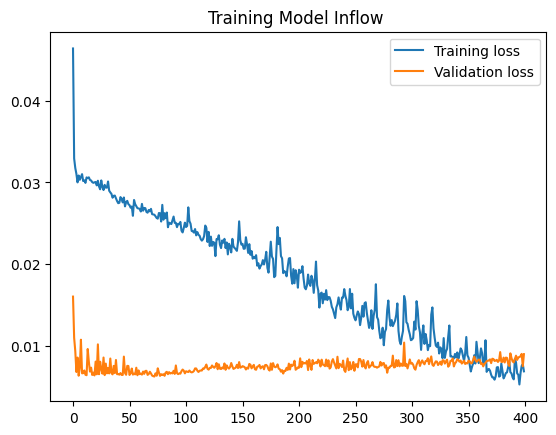

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training Model Inflow ')
plt.legend()

In [ ]:
testX,testY=createDataset(test_df,n_past)

In [ ]:
predictions = model.predict(testX)

4/4 [==============================] - 1s 21ms/step


In [ ]:
pred=scaler.inverse_transform(predictions)

In [ ]:
original_copies_array = np.repeat(testY,3, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),3)))[:,0]

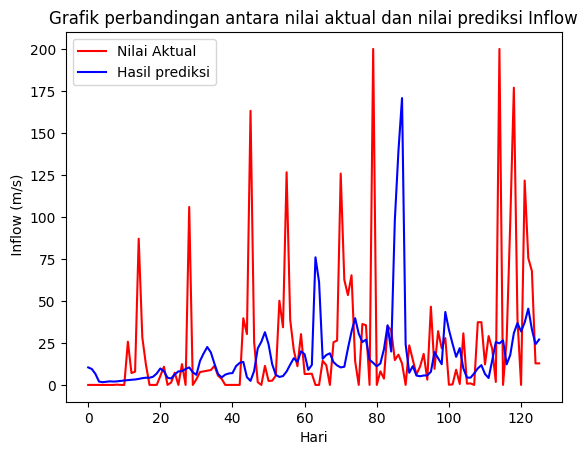

In [ ]:
plt.plot(original, color = 'red', label = 'Nilai Aktual')
plt.plot(pred, color = 'blue', label = 'Hasil prediksi')
plt.title('Grafik perbandingan antara nilai aktual dan nilai prediksi Inflow')
plt.xlabel('Hari')
plt.ylabel(' Inflow (m/s)')
plt.legend()
plt.show()

In [ ]:
# Hasil testing parameter Inflow
from sklearn.metrics import mean_squared_error
mean_squared_error(testY, predictions)

0.05103013726431605

##Forecast The future

In [ ]:
future_df = scaler.fit_transform(df)
predictX,predictY=createDataset(future_df,n_past)

In [ ]:
n_future = 365
prediction=model.predict(predictX[-n_future:])
prediction_copies = np.repeat(prediction, future_df.shape[1], axis=-1)
y_future = scaler.inverse_transform(prediction_copies)[:,0]

12/12 [==============================] - 0s 14ms/step


In [ ]:
df_past = df[['Inflow (m/s)']].reset_index()
df_past.rename(columns={'index': 'Date'}, inplace=True)
df_past['Tanggal'] = pd.to_datetime(df_past['Tanggal'])
df_past['Forecast'] = np.nan

df_future = pd.DataFrame(columns=['Tanggal', 'Inflow (m/s)', 'Forecast'])
df_future['Tanggal'] = pd.date_range(start=df_past['Tanggal'].iloc[-1] + pd.Timedelta(days=1), periods=n_future)
df_future['Forecast'] = y_future.flatten()
df_future['Inflow (m/s)'] = np.nan

<Axes: title={'center': 'Inflow waduk kedungombo'}, xlabel='Tanggal'>

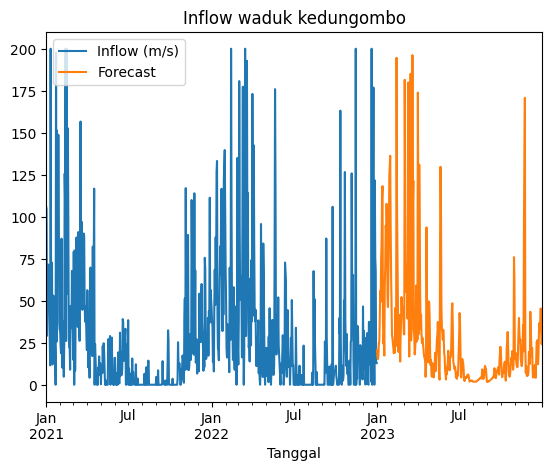

In [ ]:
results = df_past.append(df_future).set_index('Tanggal')
results.plot(title='Inflow waduk kedungombo')

In [ ]:
df_future=df_future.drop(['Inflow (m/s)'],axis=1)
df_future.to_excel('Hasil prediksi Inflow.xlsx',index=True)